# Learning From Data
## Chapter 1.3: Is Learning Feasible? 
This is a solution to an exercise that I found particularly compelling in Abu-Mostafa, et al.'s book, _Learning from Data_. The exercise is from section 1.3 of the book, which examines whether it is reasonable for us to make predictions about yet unobserved data based on that data that we have observed, which is the essence of learning. To be able to make such predictions, we need some sort of indication that our unobserved data is at least something like our observed data. While a guarantee is too much to ask, if we assume that our observations are independent from one another, we can at least make probabilistic statments about how closely our observations agree with reality at large. 

In [107]:
import numpy as np
%matplotlib inline 
import seaborn as sns
from __future__ import division
sns.set_style("whitegrid")
sns.set_context(font_scale=5)
sns.plt.xkcd();

## Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random, and $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in the case of a tie). Let $v_1$, $v_{rand}$, and $v_{min}$ be the fraction of heads you optain for the respective three coins. 

- (a) What is $\mu$ for the three coins selected? 
- (b) Repeat this experiment a large number of times (e.g. 100,000 runs of the entire experiment) to get several instances of $v_1$, $v_{rand}$, and $v_{min}$ and plot the histograms of the distributions for $v_1$, $v_{rand}$, and $v_{min}$. Notice that which coins end up being $c_1$, $c_{rand}$, and $c_{min}$ may differ from one run to another. 
- (c) Using (b), plot estimates for $P[|v - \mu| > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound, $2e^{-2\epsilon^2N}$
- (d) Which coins obey the Hoeffding bound, and which ones do not? Explain why. 
- (e) Relate part (d) to the multiple bins in Figure 1.10

### (a) What is $\mu$ for the three coins selected? 

Since $\mu$ refers to the true probability of flipping heads, and we're assuming that we're flipping a fair coin, then $P(heads) = P(tails) = 0.5$. Therefore, $\mu = 0.5$ for each of $c_1$, $c_{min}$, and $c_{rand}$, as well as for all other coins, regardless of what the outcomes are for the flips of those coins in our sample. 

### (b) Repeat this experiment a large number of times (e.g. 100,000 runs of the entire experiment) to get several instances of $v_1$, $v_{rand}$, and $v_{min}$ and plot the histograms of the distributions for $v_1$, $v_{rand}$, and $v_{min}$. Notice that which coins end up being $c_1$, $c_{rand}$, and $c_{min}$ may differ from one run to another. 


In [120]:
def conduct_experiment(p, n_flips, n_coins, n_trials):
    
    """
    Conducts `n_trials` trials of the coin-flipping experiment where
    `n_coins` coins are flipped `n_times` times each. The probability
    of flipping heads on any single coin flip is `p`. Returns v_1s,
    v_mins, and v_rands, where each is an array of length `n_trials`, with
    the i-th entry corresponding to the number of heads flipped for the 
    corresponding coin in trial i. Note that this is _not_ the fraction of 
    heads. To get the fraction of heads, divide by `n_flips`.
    
    :param: p: the probability of a single flip resulting in heads
    :param: n_flips: the number of times each coin is flipped
    :param: n_coins: the number of separate coins used in each trial 
    :param: n_trials: the number of repeated trials of the n_flips by n_coins experiment
    :return: v_1s: array of length `n_trials`; v_1s[i] is the number of heads flipped by c_1 in trial `i` 
             v_mins: array of length `n_trials`; v_mins[i] is the number of heads flipped by c_min in trial `i`
             v_rands: array of length `n_trials`; v_mins[i] is the number of heads flipped by c_rand in trial `i`
    """
    
    # Get an n_trials x n_coins matrix
    outcome = np.random.binomial(n_flips, p, (n_trials, n_coins))
    
    # First coin in every trial
    v_1s = outcome[:, 0]  
    
    # Coin with minimum number of heads for every trial
    v_mins = outcome.min(axis=1) 
    
    # Random coin from every trial
    v_rands = np.apply_along_axis(np.random.choice, 1, outcome) 
    
    return (v_1s, v_mins, v_rands)


In [115]:
P = 0.5
N_FLIPS = 10
N_COINS = 1000
N_TRIALS = 100000
v_1s, v_mins, v_rands = conduct_experiment(P, N_FLIPS, N_COINS, N_TRIALS)

In [110]:
def plot_dist(x, bins=10): 
    sns.distplot(
        x,
        hist=True,
        bins=bins, 
        hist_kws={"align": "left", "normed":True},
        kde_kws={"bw": 1,"shade": True}
    );

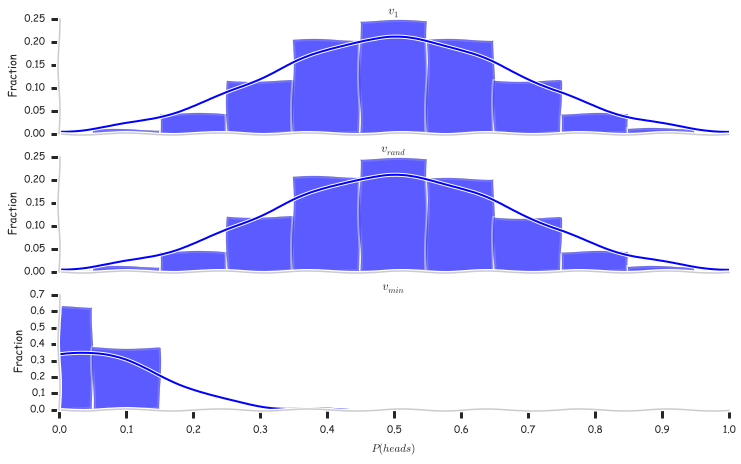

In [119]:
sns.plt.figure(figsize=(12,7))
sns.plt.subplot(3,1,1)
plot_dist(v_1s);
sns.plt.ylabel("Fraction")
sns.plt.title("$v_1$");
sns.plt.xlim(0,10)
sns.plt.xticks([])

sns.plt.subplot(3,1,2)
plot_dist(v_rands);
sns.plt.ylabel("Fraction");
sns.plt.title("$v_{rand}$");
sns.plt.xlim(0,10)
sns.plt.xticks([])

sns.plt.subplot(3,1,3)
plot_dist(v_mins, bins=2);
sns.plt.xlabel("$P(heads)$");
sns.plt.ylabel("Fraction");
sns.plt.title("$v_{min}$");
sns.plt.xlim(0,10)
sns.despine()

sns.plt.xticks(np.arange(11), np.arange(11)/10);

We can see that $v_1$ and $v_{rand}$ behave identically, as one might expect, since there is nothing special about the first coin--it might as well be a random coin. In other words, $c_1$ and $c_{rand}$, the coins that produce $v_1$ and $v_{rand}$, respectively, are chosen independent of the observed data, and could be fixed prior to doing any flipping at all. On the other hand, $c_{min}$ is only chosen after all the flipping is done. In almost every trial, there was at least one coin where the observed probability of flipping heads was $\le0.1$ 

This is why the distributions of $v_1$ and $v_{rand}$ are centered over the true mean, $\mu$, while $v_{min}$ is not.

### (c) Using (b), plot estimates for $P[|v - \mu| > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound, $2e^{-2\epsilon^2N}$


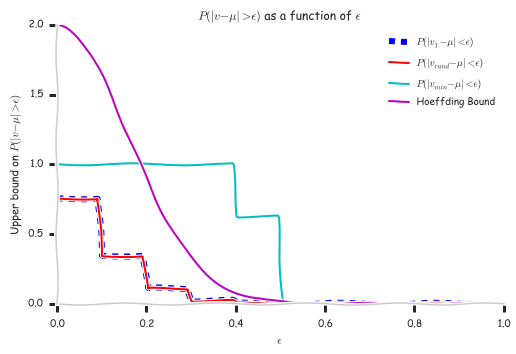

In [122]:
def hoeffding(epsilon, N=N_FLIPS): 
    return 2 * np.exp(-2 * (epsilon**2) * N)

def p_big_error(v, mu, epsilon):
    return (np.abs(v - mu)/N_FLIPS > epsilon).mean()

epsilons = np.linspace(0,10,100)/N_FLIPS

c1_errs = [p_big_error(c_1s, 5, e) for e in epsilons]
c_rand_errs = [p_big_error(c_rands, 5, e) for e in epsilons]
c_min_errs = [p_big_error(c_mins, 5, e) for e in epsilons]

sns.plt.figure(figsize=(8,5));
sns.plt.plot(epsilons, c1_errs, linewidth=6, linestyle= "--");
sns.plt.plot(epsilons, c_rand_errs);
sns.plt.plot(epsilons, c_min_errs);
sns.plt.plot(epsilons, np.apply_along_axis(hoeffding, 0, epsilons));
sns.plt.legend(
    [
        "$P(|v_1 - \mu| < \epsilon)$",
        "$P(|v_{rand} - \mu| < \epsilon)$",
        "$P(|v_{min} - \mu| < \epsilon)$",
        "Hoeffding Bound"
    ]
);
sns.despine();
sns.plt.xlabel("$\epsilon$");
sns.plt.ylabel("Upper bound on $P(|v - \mu| > \epsilon)$");
sns.plt.title("$P(|v - \mu| > \epsilon)$ as a function of $\epsilon$");

### (d) Which coins obey the Hoeffding bound, and which ones do not? Explain why. 


We can see from the plot that $v_{rand}$ and $v_{first}$ obey the Hoeffding inequality, but $v_{min}$ does not. That's because $v_{min}$ was specifically chosen from a set of 100,000 samples based on the sample results. 

### (e) Relate part (d) to the multiple bins in Figure 1.10

This is analogous to the situation where $h$ is not chosen a priori, but rather chosen from a hypothesis set, $H$, according to the observed data. The number of possible hypotheses, $M$, is not accounted for. Regarding the "bins", each of which represents a different hypothesis, $h$, for $v_{rand}$ and $v_{first}$, we've decided on a particular $h$ before seeing the data, so it's as though we're only looking at one bin, $h$ is fixed, and Hoeffding holds. In the case of $v_{min}$, we pick a bin after being presented with all of the data. The Hoeffding inequality, which describes a bound on the difference between our observed fraction of heads, $v$, and the "actual" fraction of heads, $\mu$, assumes that $v$ is from a single random sample. That assumption is violated in the case of $v_{min}$